# Zuber EDA & SDA Project

In this project, we will conduct and statistical and exploratory analysis of the new ride-sharing company launching in Chicago, Zuber. We will find patterns from data from taxi companies already existing that was obtained by parsing the link : https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html, and csv files containing data with exisiting taxi companies.

Our goal is to understand passenger prefences and the impact of external factors on rides. We will also analyze the data from competitors and test a hypothesis about the impact weather has on ride frequency.

## Company and Number of Trips

In [1]:
# Importing necessary packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Reading Company vs Trips Count CSV File
company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
display(company_trips)
company_trips.info()
company_trips.describe()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [3]:
company_trips.duplicated().sum()

0

In our company_trips dataframe, we have two columns. One for the company names that gives rides and the other being the amount of rides they gave. Both types seem to be appropriate for SDA so I left them as they are.There were no duplicate rows of data found. I then ran the describe() method to get a statisical summary of the data.

It looks as the average amount of rides given by company is about 2145 rides. The median is around 179. The max amount of rides was given by Flash Cab, which seems to be a big company in the city as the min company seems to be named after a person. I will assume here that the lower counts are small companies ran by individual drivers.


## Dropoff Location v Avg Trips

In [4]:
# Reading Dropoff Location and Average Trips File
dropoff_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
display(dropoff_trips)
dropoff_trips.info()
dropoff_trips.describe()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [5]:
dropoff_trips.duplicated().sum()

0

In [6]:
# Top Ten Dropoff Locations in Chicago
top_10_dropoff_locations = dropoff_trips.iloc[:10]
display(top_10_dropoff_locations)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


At an initial glance of the data we can see that the types seem to be appropriate. The dropoff_location_name is a str type and the average_trips a float type. The dropoff_trips dataframe contained now duplicated rows.

From our dropoff_location dataframe, we see that the Loop neighborhood is a favorite spot to be dropped off in with a max of 10727 average dropoffs. Riverdale came in at the lowest at 1.8 dropoffs. The mean average trip was 600 and the median came in at 52. 


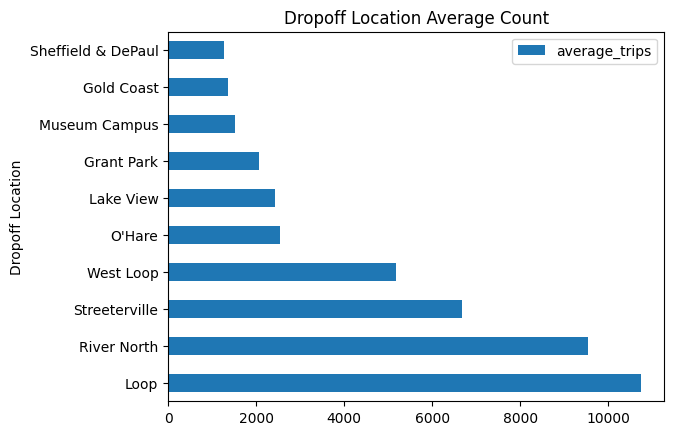

In [7]:
# Neighborhood Dropoff Bar Chart
top_10_dropoff_locations.plot.barh(
    x='dropoff_location_name', 
    xlabel='Dropoff Location', 
    ylabel='Average Trips', 
    title='Dropoff Location Average Count')
plt.show()

Looking at the Dropoff Location Average Count bar chart, we see that the statistical summary agrees with our visualization. The Loop seems to be the most popular spot to be dropoffed at. River North comes in at a close second place with Streeterville being third. It quickly drops off after River North however.

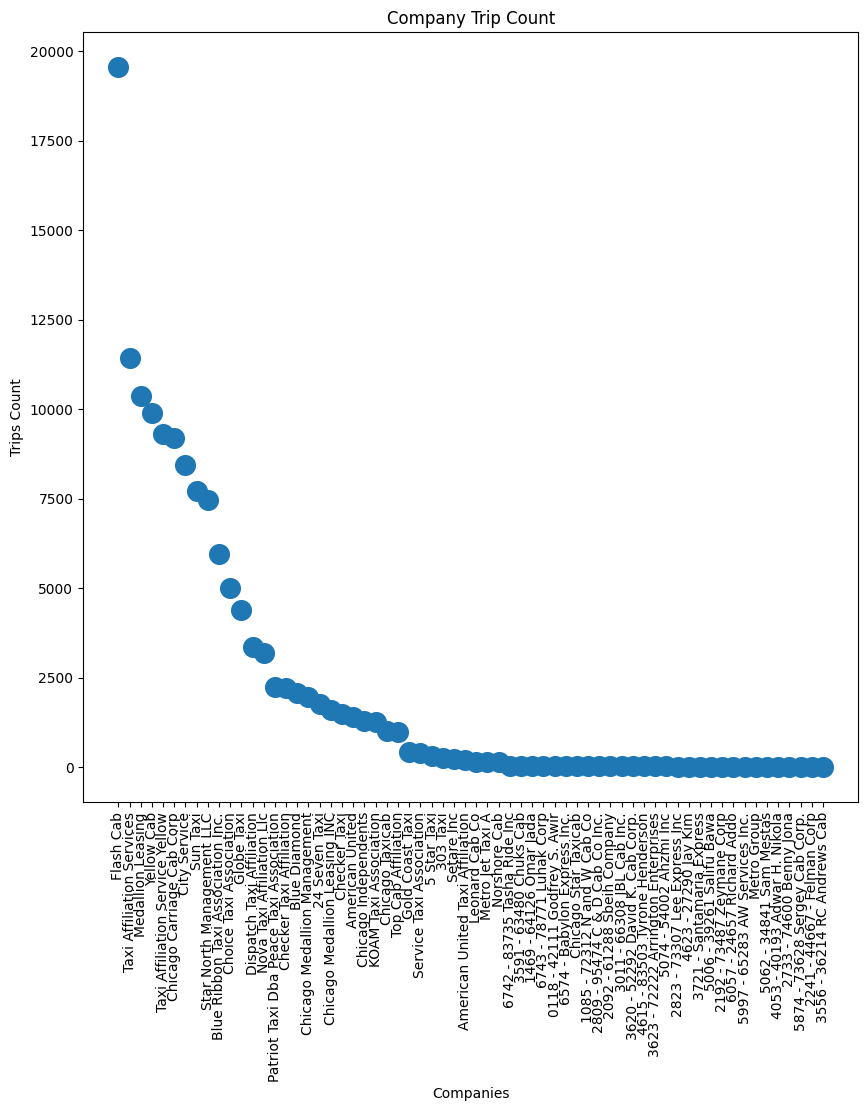

In [8]:
#Scatterplot showing number of trips made by each company
company_trips.plot.scatter(x='company_name',
                           y='trips_amount',
                           s=200,
                           figsize=(10,10),
                           rot=90,
                           title='Company Trip Count',
                           xlabel='Companies',
                           ylabel='Trips Count')
plt.show()

In our scatterplot for the Company Trip Count, just as our statistical summary showed on the dataframe, The Flash Cab company is a clear outlier when it comes to attracting customers for rides with a count at almost 20000 trips. The next company, Taxi Affilation Services comes in at 2nd at 11422 trips. We would have to conduct more research on why the Flash Cab company is a large player in the ride-sharing business.

## Loop to Ohare Trips and Weather Conditions Analysis

In [9]:
# Reading dataset that contains the trips for O'hare and Loop with their weather conditions
loop_ohare_df = pd.read_csv('/datasets/project_sql_result_07.csv')
display(loop_ohare_df)
loop_ohare_df.info()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [10]:
# Ensuring the weather_conditions type is a str
loop_ohare_df['weather_conditions'] = loop_ohare_df['weather_conditions'].astype(str)

In [11]:
# Checking for any other unique values in the weather_conditions column
loop_ohare_df['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [12]:
print(loop_ohare_df[loop_ohare_df['duration_seconds']==0])

                 start_ts weather_conditions  duration_seconds
163   2017-11-11 09:00:00               Good               0.0
168   2017-11-11 07:00:00               Good               0.0
204   2017-11-18 19:00:00               Good               0.0
552   2017-11-04 01:00:00               Good               0.0
801   2017-11-04 09:00:00               Good               0.0
1063  2017-11-25 11:00:00               Good               0.0


In [13]:
loop_ohare_df.drop([163,168,204,552,801,1063],axis=0,inplace=True)

In [14]:
print(loop_ohare_df[loop_ohare_df['duration_seconds']==0])
loop_ohare_df = loop_ohare_df[loop_ohare_df['duration_seconds'] > 0]

Empty DataFrame
Columns: [start_ts, weather_conditions, duration_seconds]
Index: []


In this dataframe we are looking at trips from the Loop to O'Hare Airport between November 15-16 2017 and the weather conditions on those dates. I checked for data types and searched for unique values in the weather_conditions column to see if there were any other values besides Good or Bad. 

I also searched for rows where the duration_seconds had 0 values as this may have been a ride that got canceled which would effect some of our statisitical results. Once I those rows were found they were removed from the dataframe.

For the weather_conditions column I assumed that Bad meant that there was a rainy day that occured. 

In [15]:
# Query for filtering only rows with Bad weather conditions
bad_duration = loop_ohare_df.query(" weather_conditions == 'Bad'")
display(bad_duration)

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


In [16]:
# Query filtering for rows with only Goog weather_conditions
good_duration = loop_ohare_df.query("weather_conditions == 'Good'")
display(good_duration)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1062,2017-11-11 06:00:00,Good,1500.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


In [17]:
# Sanity check for mean
mean_bad_duration = bad_duration['duration_seconds'].mean()
print(mean_bad_duration)
bad_duration.describe()

2427.2055555555557


,duration_seconds
count,180.000000
mean,2427.205556
std,721.314138
min,480.000000
25%,1962.000000
50%,2540.000000
75%,2928.000000
max,4980.000000


In [18]:
# Sanity check for mean
mean_good_duration = good_duration['duration_seconds'].mean()
print(mean_good_duration)
good_duration.describe()

2013.2789115646258


,duration_seconds
count,882.000000
mean,2013.278912
std,743.565217
min,60.000000
25%,1397.250000
50%,1800.000000
75%,2460.000000
max,7440.000000


In [19]:
# Preparing data for two sided ttest to test hypothesis
good_duration_sec = good_duration['duration_seconds']
display(good_duration_sec)

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1060    2700.0
1062    1500.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 882, dtype: float64

In [20]:
# Preparing data for two sided ttest to test hypothesis
bad_duration_sec = bad_duration['duration_seconds']
display(bad_duration_sec)

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

After filtering the rows for good and bad weather condition days, we will test the hypothesis:  The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

Our null hypothesis: The average duration of rides from the Loop to O'hare International Airport does not change on rainy Saturdays.

Alternative hypothesis: The average duration of rides from the Loop to O'hare International Airport changes on rainy Saturdays.

I choose our level of significance to be set at 5% and conduct a two sided T-test to determine whether to reject or fail to reject the null hypothesis.

In [21]:
# Test the hypothesis: The average duration of rides from the Loop to O'Hare International Airport 
# changes on rainy Saturdays.

alpha = .05

results = st.stats.ttest_ind(good_duration_sec, bad_duration_sec, equal_var=True)

print('p-value:', results.pvalue)


if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

p-value: 1.3318772977743245e-11
Reject the null hypothesis


/tmp/ipykernel_50/1272723816.py:6: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(good_duration_sec, bad_duration_sec, equal_var=True)


## Conclusion

After conducting our EDA and SDA on the data that we obtained we discovered many useful insights.

From our Company and their Number of Trips dataframe we discovered that the top company was easily Flash Cab. They recorded the highest amount of trips at 19558 trips. I would recommend that Zuber does further research to see what is making Flash Cab attract customers.

From our Dropoff Location dataframe, we discovered that the Loop neighborhood was the most popular to be dropped off at. Zuber should consider having a high amount of drivers in the Loop location for a high amount of trips to be made for future customers.

From our Loop to Ohare dataset we found that from our statisitcal summary that the mean time that it took to complete trips on rainy days was higher than trips on days with good weather conditions. The two sided statisitical t-test showed that we need to reject the null hypothesis of the average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays. We ran the ttest with our two samples of data from rainy days and good weather condition days with an alpha = .05, and the p-value returned a very small value (1.33 ^ -11). Therefore Zuber should prepare to plan for longer trips on rainy Saturdays.